#### 차원축소는 데이터에서 패턴을 찾고 이러한 패턴을 사용하여 압축 된 형식으로 다시 표현 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
g = pd.read_csv('data/Grains/seeds-width-vs-length.csv',header = None)
g.head()

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [9]:
width = g[0]
length = g[1]

In [11]:
from scipy.stats import pearsonr

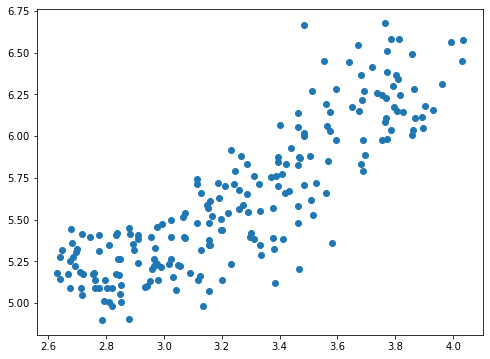

In [12]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter (width , length )
plt.show()

In [13]:
# 피어슨 상관계수 파악 

pearsonr(width , length)

(0.8604149377143463, 8.121332906196003e-63)

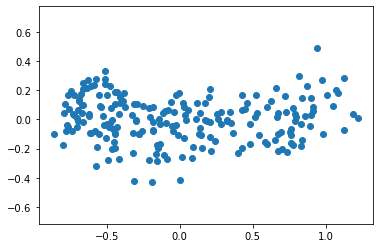

4.412702842016003e-17


In [18]:
# PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

from sklearn.decomposition import PCA

model = PCA()

pca_features = model.fit_transform(g)

xs = pca_features[:,0]

ys = pca_features[:,1]

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(xs, ys)

print(correlation)

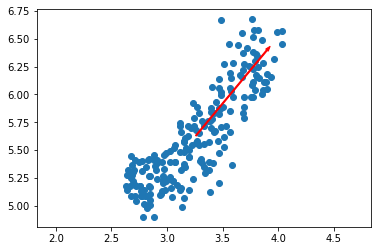

In [19]:
#Intrinsic dimension

plt.scatter(g[0], g[1])

model = PCA()

model.fit(g)

mean = model.mean_

first_pc = model.components_[0,:]

plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

plt.axis('equal')
plt.show()

In [21]:
# Variance of the PCA features
# fish data 사용

fish = pd.read_csv('data/fish.csv', header = None)
fish.head(1)

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4


In [22]:
samples = fish.iloc[:, 1:].values
species = fish.iloc[:, 0].values

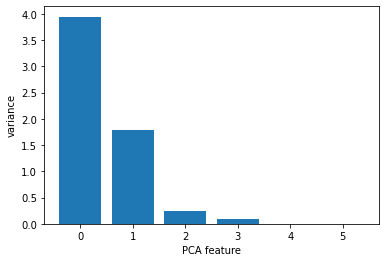

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

pca = PCA()

pipeline = make_pipeline(scaler, pca)

pipeline.fit(samples)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features);